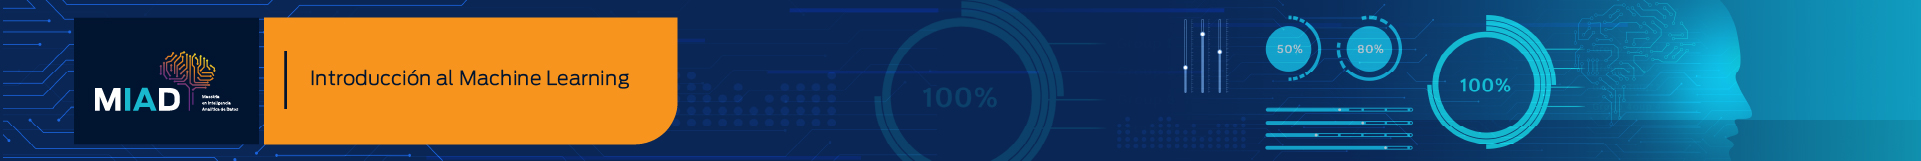

# Introducción al Machine Learning - Semana 6
## Caso: implementación de metodologías de imputación de variables e imbalanceo de clases


### Propósito de la actividad

En esta actividad podrán poner en práctica, con un conjunto de datos reales, su habilidad para gestionar situaciones de datos faltantes e imbalanceo de clases.

Además, como en todo procedimiento de analítica de datos, se evaluará la exploración preliminar de los datos por medio de herramientas como histogramas, correlogramas y estadísticas descriptivas.

### Instrucciones generales

1. Para desarrollar el notebook, lo deberán descargar a un repositorio (pueden escoger el repositorio de su preferencia) para que lo puedan trabajar grupalmente.

2. Los procedimientos en el notebook deberán responderse en los espacios especificados para tal fin, debajo de cada uno de los puntos.

3. Para que la actividad sea calificada, deberán subir únicamente este mismo archivo con la extensión ".ipynb" a la actividad de "entrega calificada por el personal" correspondiente a este caso.

4. El archivo que suban debe poder ejecutarse localmente cuando sea descargado por el tutor, asumiendo que la base de datos de la actividad ya ha sido importada en el correspondiente archivo separado por comas (.csv).

### Primer conjunto de datos

Utilice el archivo de datos "Missing data.csv" que se encuentra en este repositorio para hacer los siguientes tres puntos:

### 1. Análisis preliminar de variables del primer conjunto de datos (5 puntos)

Realicen un análisis preliminar de los predictores y de la variable de respuesta para el primer conjunto de datos (correlogramas, histogramas y estadísticas descriptivas).

In [ ]:
!pip install imblearn
!pip install imbalanced-learn

In [48]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 1 ####

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import math

from sklearn import datasets
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_csv ("MissingData.csv")

XTotal = df.loc[:,df.columns!="Class"]
yTotal = df.loc[:,df.columns=="Class"]

print(df)

                     Class  date  plant.stand  precip  temp  hail  crop.hist  \
0    diaporthe-stem-canker   6.0          0.0     2.0   1.0   0.0        1.0   
1    diaporthe-stem-canker   4.0          0.0     2.0   1.0   0.0        2.0   
2    diaporthe-stem-canker   3.0          0.0     2.0   1.0   0.0        1.0   
3    diaporthe-stem-canker   3.0          0.0     2.0   1.0   0.0        1.0   
4    diaporthe-stem-canker   6.0          0.0     2.0   1.0   0.0        2.0   
..                     ...   ...          ...     ...   ...   ...        ...   
678           2-4-d-injury   0.0          NaN     NaN   NaN   NaN        NaN   
679       herbicide-injury   0.0          1.0     NaN   0.0   NaN        0.0   
680       herbicide-injury   2.0          1.0     NaN   0.0   NaN        0.0   
681       herbicide-injury   0.0          1.0     NaN   0.0   NaN        1.0   
682       herbicide-injury   2.0          1.0     NaN   0.0   NaN        1.0   

     area.dam  sever  seed.tmt  ...  in

In [3]:
#Dimensiones originales de dataset
df.shape

(683, 36)

In [4]:
#Variables de dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Class            683 non-null    object 
 1   date             682 non-null    float64
 2   plant.stand      647 non-null    float64
 3   precip           645 non-null    float64
 4   temp             653 non-null    float64
 5   hail             562 non-null    float64
 6   crop.hist        667 non-null    float64
 7   area.dam         682 non-null    float64
 8   sever            562 non-null    float64
 9   seed.tmt         562 non-null    float64
 10  germ             571 non-null    float64
 11  plant.growth     667 non-null    float64
 12  leaves           683 non-null    int64  
 13  leaf.halo        599 non-null    float64
 14  leaf.marg        599 non-null    float64
 15  leaf.size        599 non-null    float64
 16  leaf.shread      583 non-null    float64
 17  leaf.malf       

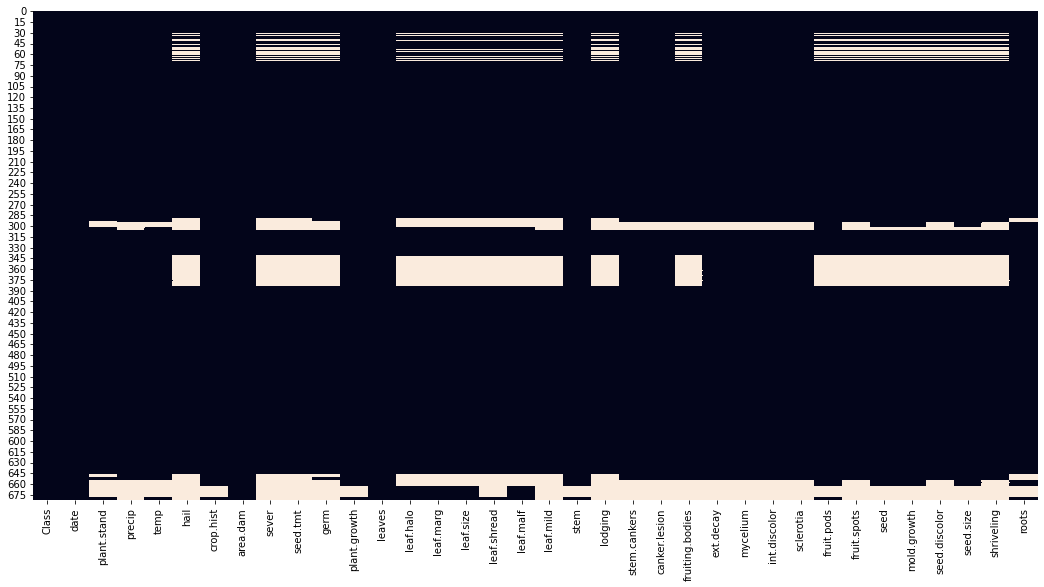

In [5]:
#Vistazo general de datos faltantes
plt.figure(figsize=(18, 9))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [6]:
#Estadísticas descriptivas
for i, col in enumerate(df.columns):
    print(df[col].describe(), '\n')

count            683
unique            19
top       brown-spot
freq              92
Name: Class, dtype: object 

count    682.000000
mean       3.554252
std        1.694117
min        0.000000
25%        2.000000
50%        4.000000
75%        5.000000
max        6.000000
Name: date, dtype: float64 

count    647.000000
mean       0.452859
std        0.498158
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: plant.stand, dtype: float64 

count    645.000000
mean       1.596899
std        0.686147
min        0.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        2.000000
Name: precip, dtype: float64 

count    653.000000
mean       1.182236
std        0.628214
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: temp, dtype: float64 

count    562.000000
mean       0.225979
std        0.418598
min        0.000000
25%        0.000000
50%        0.000000
75

<ipython-input-7-a886ae913dd7>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)
<ipython-input-7-a886ae913dd7>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)
<ipython-input-7-a886ae913dd7>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)
<ipython-input-7-a886ae913dd7>:3: RuntimeWa

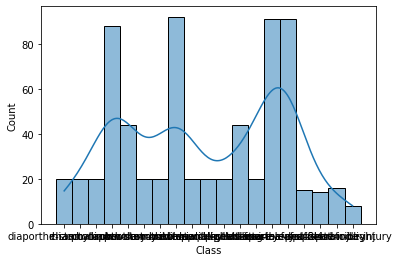

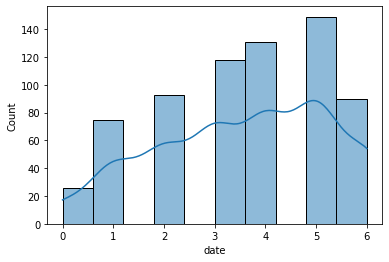

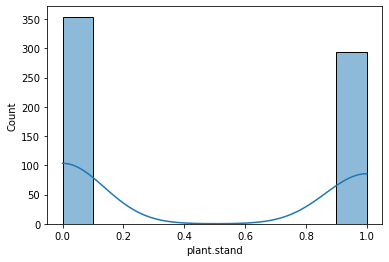

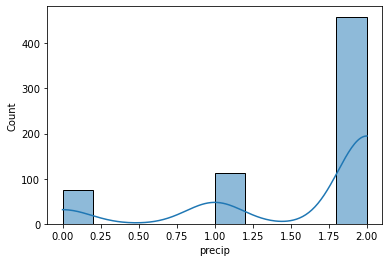

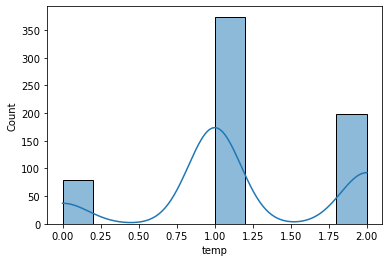

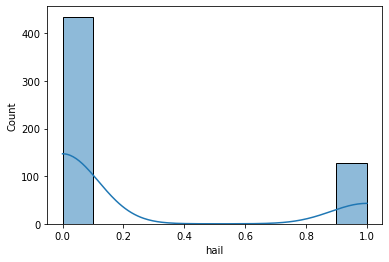

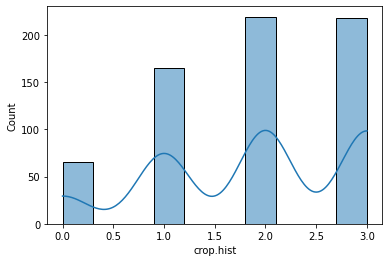

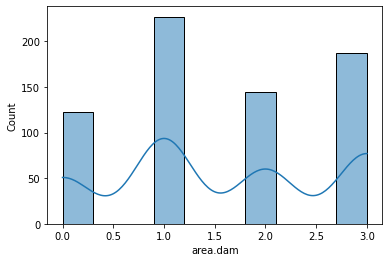

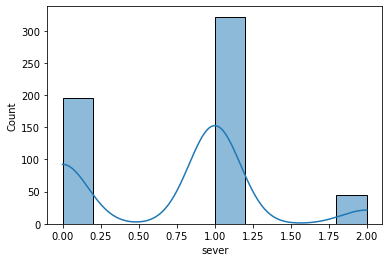

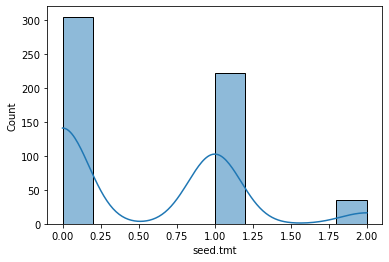

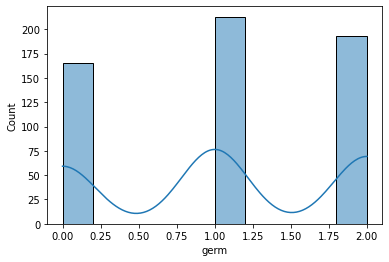

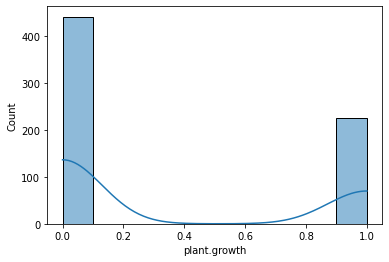

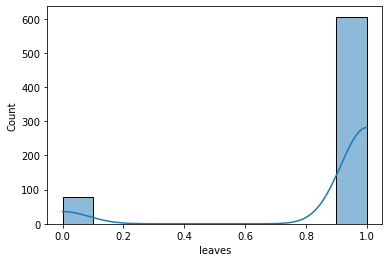

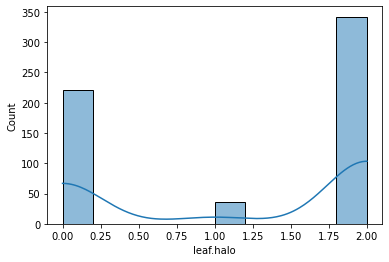

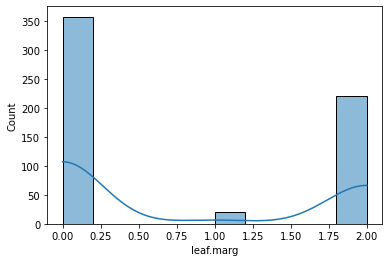

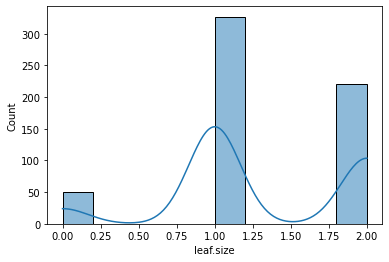

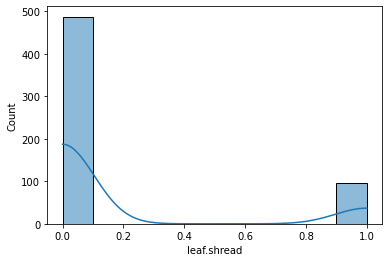

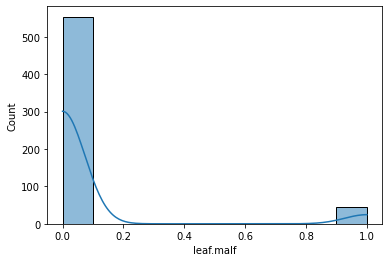

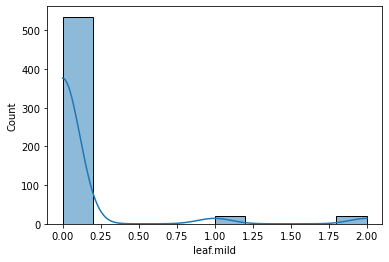

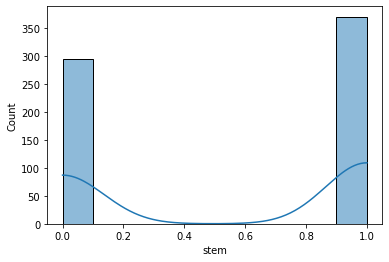

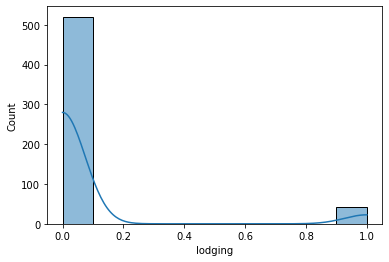

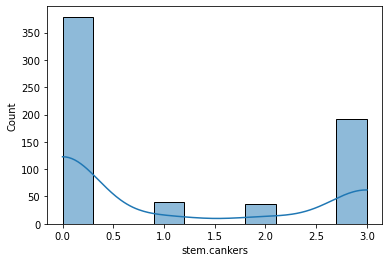

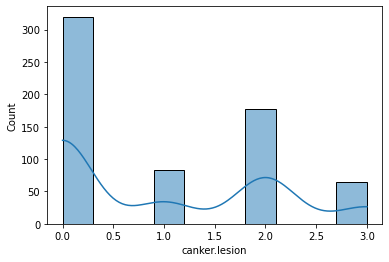

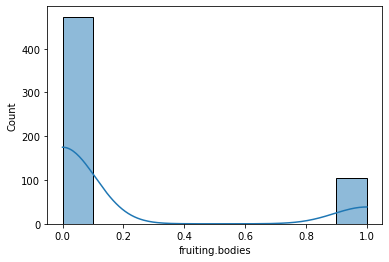

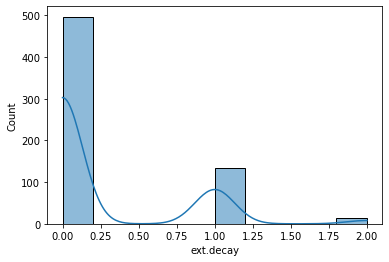

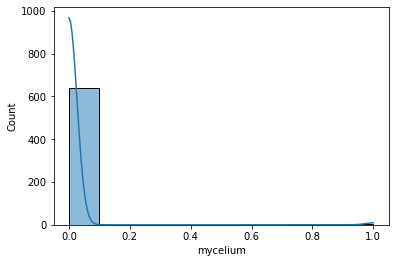

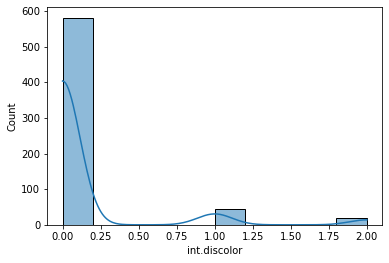

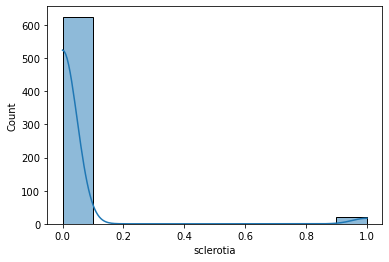

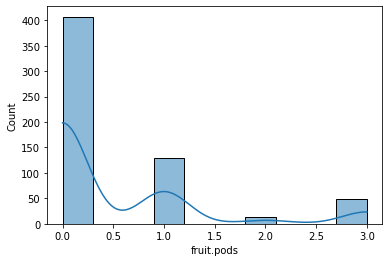

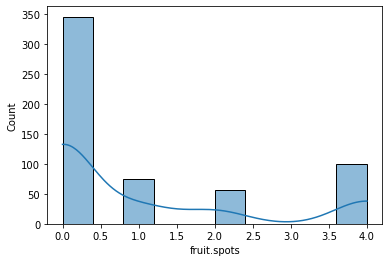

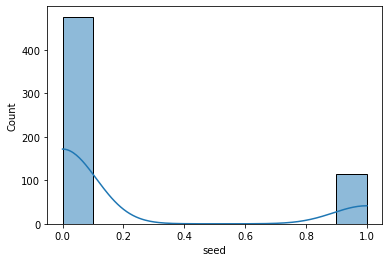

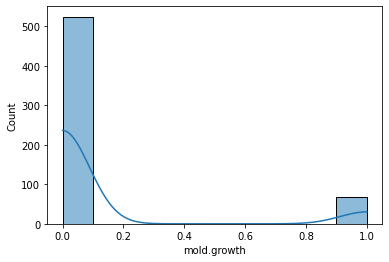

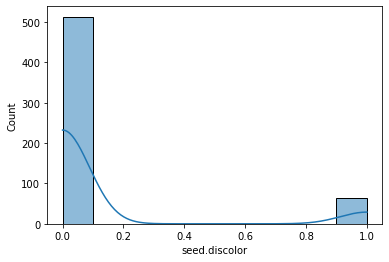

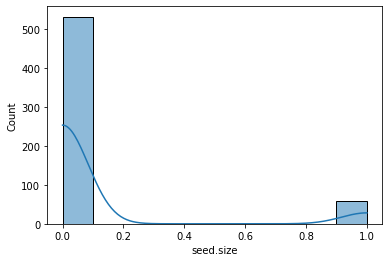

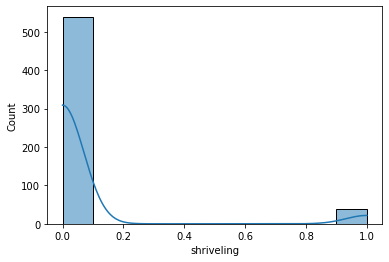

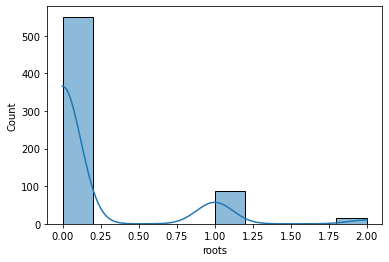

In [7]:
#Histogramas
for i, col in enumerate(df.columns):
    plt.figure(i)
    sns.histplot(df[col], bins=10, kde=True)

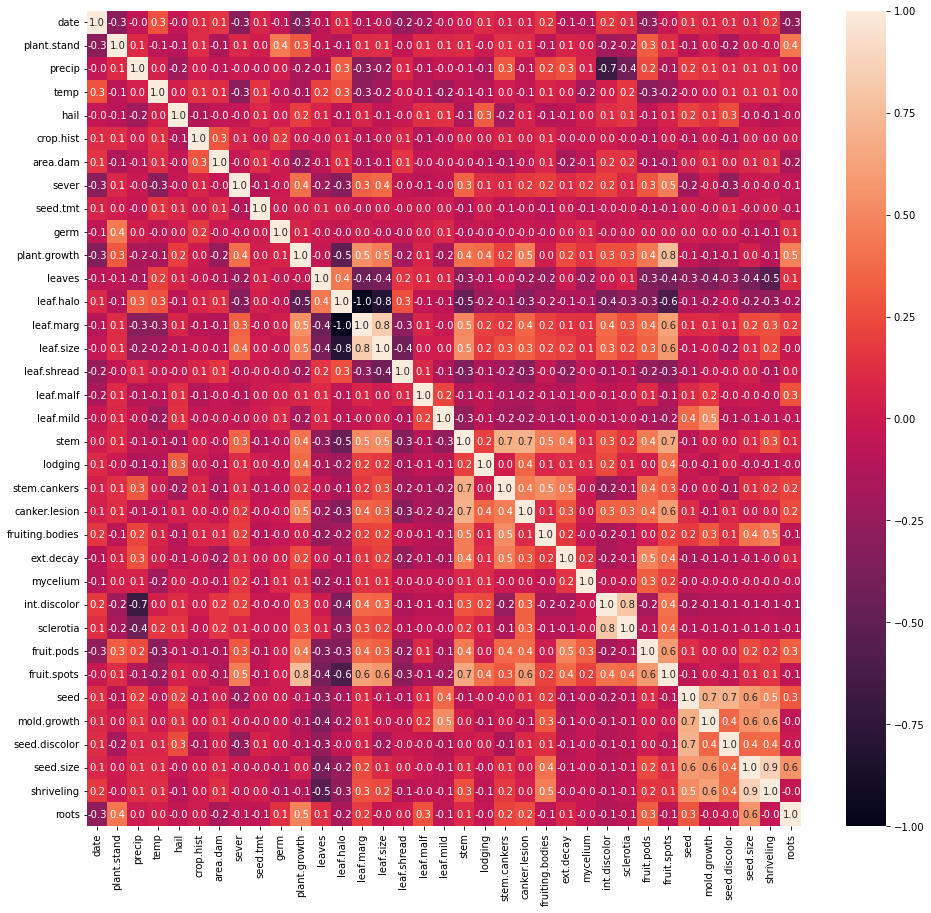

In [8]:
#Mapa de calor
plt.figure(figsize=(16, 15))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, fmt='.1f')

(Utilice este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 1)

### 2. Gestión de datos faltantes (25 puntos)
Realicen una partición de la muestra en un conjunto de entrenamiento y otro de evaluación. Con la muestra de entrenamiento, realicen un procedimiento de imputación simple multivariada para todas las variables que tengan datos faltantes en sus filas.

In [87]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 2 ####


(Utilice este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 2)

### 3. Estimación de modelo de clasificación (10 puntos)
Escojan un modelo de clasificación de los vistos en la semana 3 del curso e impleméntenlo. Evalúen su poder predictivo en la muestra de evaluación debidamente transformada, de acuerdo a la imputación hecha en el conjunto entrenamiento.

In [ ]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 3 ####


(Utilice este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 3)

### Segundo conjunto de datos

Para los siguientes cinco puntos, utilice la base de datos "raw_df" que tiene información sobre tarjetas de crédito y se descarga con las siguientes líneas de código:

In [9]:
raw_df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
raw_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### 4. Análisis preliminar de variables del segundo conjunto de datos (5 puntos)

Realicen un análisis preliminar de los predictores y de la variable de respuesta para el segundo conjunto de datos (correlogramas, histogramas y estadísticas descriptivas).

In [88]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 4 ####

(Utilice este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 4)

### 5. Implementación de QDA (10 puntos)
Realicen una partición de la muestra en un conjunto de entrenamiento y otro de evaluación. Una vez se ha hecho esto, calibren un modelo QDA con la muestra de entrenamiento y evalúen su poder predictivo en la muestra de evaluación.

In [18]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 5 ####

XTotal_QDA = raw_df.drop(['Amount', 'Class'], axis=1).to_numpy()
yTotal_QDA = raw_df['Class'].to_numpy()

#Partición de datos
XTrain_QDA, XTest_QDA, yTrain_QDA, yTest_QDA = train_test_split(XTotal_QDA, yTotal_QDA, test_size=0.33, random_state=0)


clfQDA = QuadraticDiscriminantAnalysis()
clfQDA.fit(XTrain_QDA, yTrain_QDA)

prediccionesQDA = clfQDA.predict(XTest_QDA)
prediccionesProbQDA = clfQDA.predict_proba(XTest_QDA)

#### Error de predicción

In [29]:
#Error de predicción 
errorQDA = 0
for i in range(0, len(yTest_QDA)):
    if(yTest_QDA[i] != prediccionesQDA[i]):
        errorQDA += 1/len(yTest_QDA)
print("El error de predicción es "+str(round(errorQDA,6)))

El error de predicción es 0.022982


#### Matriz de confusión

In [30]:
#Matriz de confusión
print("La matriz de confusión es ")
print(confusion_matrix(y_true = yTest_QDA, y_pred = prediccionesQDA))

La matriz de confusión es 
[[91687  2138]
 [   22   140]]


#### Accuracy

In [33]:
#Accuracy
accuracyQDA = accuracy_score(y_true = yTest_QDA, y_pred = prediccionesQDA)
print('El Accuracy del modelo es'+str(round(accuracyQDA,6)))

El Accuracy del modelo es0.977018


#### Precisión

In [34]:
#Precisión
precisionQDA = precision_score(y_true = yTest_QDA, y_pred = prediccionesQDA)
print("La Precisión del modelo es "+str(round(precisionQDA,6)))

La Precisión del modelo es 0.061457


#### Curva ROC y AUC

Curva ROC y AUC:


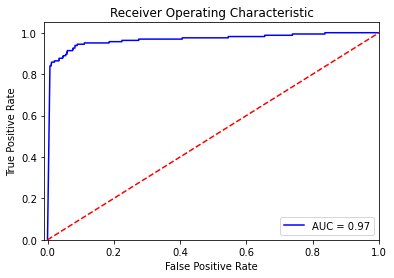

In [35]:
print('Curva ROC y AUC:')
fpr, tpr, thresholds = metrics.roc_curve(yTest_QDA, prediccionesProbQDA[:, 1], pos_label = 1)
AUCQDA = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCQDA)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 5)

### 6. Gestión de imbalanceo de clases (25 puntos)
Realicen un procedimiento para gestionar las clases imbalanceadas de la base de datos con el conjunto de entrenamiento. 

In [ ]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 6 ####

#Carga de datos
XTotal = raw_df.drop(['Amount', 'Class'], axis=1)#.to_numpy()
yTotal = raw_df['Class']#.to_numpy()

#Partición de datos
XTrain, XTest, yTrain, yTest = train_test_split(XTotal, yTotal, test_size=0.33, random_state=0)

In [ ]:
#Correlograma de variables sin balancear
cols = XTrain.columns
for i in range(len(XTrain.columns)-1):
    for j in range(len(XTrain.columns)-1):
        if j >= i:
            plt.scatter(XTrain.iloc[:,i][yTrain==0],XTrain.iloc[:,j+1][yTrain==0],c='red')
            plt.scatter(XTrain.iloc[:,i][yTrain==1],XTrain.iloc[:,j+1][yTrain==1])
            plt.xlabel(cols[i])
            plt.ylabel(cols[j+1])
            plt.title(cols[i] + ' vs. ' + cols[j+1])
            plt.show()

(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 6)

### 7. Implementación de random forest (10 puntos)
Estimen un modelo random forest para predecir la variable de respuesta y midan su desempeño en la muestra de evaluación.

In [70]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 7 ####

#Carga de datos
XTotal = raw_df.drop(['Amount', 'Class'], axis=1)#.to_numpy()
yTotal = raw_df['Class']#.to_numpy()

#Partición de datos
XTrain_RF, XTest_RF, yTrain_RF, yTest_RF = train_test_split(XTotal, yTotal, test_size=0.33, random_state=0)

#Rebalanceo de clases usando SMOTE
sm = SMOTE() #SMOTE con parámetros por default
XTrain_res, yTrain_res = sm.fit_resample(XTrain_RF, yTrain_RF)

#Estimación del modelo usando Random Forest
clfRF = RandomForestClassifier(random_state=0)
clfRF.fit(XTrain_res, yTrain_res)

prediccionesRF = clfRF.predict(XTest_RF)
prediccionesProbRF = clfRF.predict_proba(XTest_RF)

#### Matriz de confusión

In [82]:
#Matriz de confusión
print("La matriz de confusión es ")
print(confusion_matrix(y_true = yTest_RF, y_pred = prediccionesRF))

La matriz de confusión es 
[[93807    18]
 [   28   134]]


#### Accuracy

In [83]:
#Accuracy
accuracyRF = accuracy_score(y_true = yTest_RF, y_pred = prediccionesRF)
print('El Accuracy del modelo es '+str(round(accuracyRF,6)))

El Accuracy del modelo es 0.999511


#### Error de predicción

In [84]:
errorRF = 1-accuracyRF
print("El error de predicción es "+str(round(errorRF,6)))

El error de predicción es 0.000489


#### Precisión

In [85]:
#Precisión
precisionRF = precision_score(y_true = yTest_RF, y_pred = prediccionesRF)
print("La Precisión del modelo es "+str(round(precisionRF,6)))

La Precisión del modelo es 0.881579


#### Curva ROC y AUC

Curva ROC y AUC:


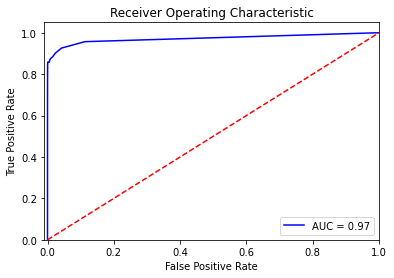

In [86]:
print('Curva ROC y AUC:')
fpr, tpr, thresholds = metrics.roc_curve(yTest_RF, prediccionesProbRF[:, 1], pos_label = 1)
AUCRF = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCRF)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Los resultados de las métricas desempeño del modelo Random Forest se pueden asociar al hecho de ajustr el modelo con datos balanceados.

Numéricamente, lo anterior se fundamenta en un accuracy de 99.95% y, consecuentemente, un error de predicción de menos del 0.05% (la cantidad de predicciones erróneas sobre el total de la muestra), precisión de 88.16% y niveles altos de sensibilidad y especificidad con un AUC de 97% (la curva ROC está lo más arriba y más a la izquierda posible).

### 8. Elección del mejor modelo (10 puntos)
¿Cuál modelo de los dos modelos estimados (QDA sin balancear y random forest balanceando) en este caso resulta mejor para la predicción de la variable de respuesta en la segunda base de datos? Justifiquen su respuesta.

(Utilicen este espacio para escribir su análisis y conclusiones sobre el punto 8)